<h1 style="font-size:36px;">Data exploration of synthetic data generated from INSPIRE, a publicly available research dataset for perioperative medicine</h1>

<h2 style="font-size:20px;">In this script data exploration and analysis of "operations_Gretel_tabular_actgan.csv"  which is essentailly a synthetic version of original "operations.csv" from INSPIRE is shown</h2>

link to gretel.ai: https://console.gretel.ai/proj_2Z7R2lTw5P0JagOUtSy9W3nVy5S/models/656ef7aeac3ffb4c83838dad/data

link to INSPIRE dataset: https://physionet.org/content/inspire/0.1/

A full list of the ICD-10-CM codes and the description can be found on the Centers for Disease Control and Prevention (CDC) website 
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD10CM/April-1-2023-Update/icd10cm-code%20descriptions-%20April%201%202023.zip.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # Example, importing datasets module
import tensorflow as tf
import torch
import keras
import scipy
import statsmodels
import sdv
from ctgan import CTGAN
from ctgan import load_demo
from sdv.single_table import CTGANSynthesizer


print("Libraries Imported")

Libraries Imported


In [6]:
df_real_operations_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\operations.csv')

In [7]:
df_real_operations = df_real_operations_original.copy()


In [8]:
df_real_operations.head()

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
0,484069807,178742874,229842382,NaN,0,30,F,48.0,153.0,Asian,...,1230.0,0,7195,1120.0,1235.0,NaN,NaN,NaN,NaN,NaN
1,446270725,158995752,257857903,NaN,0,70,M,43.0,169.0,Asian,...,1540.0,0,70555,1345.0,1540.0,NaN,NaN,1550.0,19595.0,69860.0
2,406892271,108553242,200664328,NaN,61920,50,F,69.0,165.0,Asian,...,62380.0,0,178555,62170.0,62370.0,NaN,NaN,NaN,NaN,NaN
3,478413008,133278262,277235295,NaN,0,35,F,54.0,NaN,Asian,...,330.0,0,5755,215.0,340.0,NaN,NaN,NaN,NaN,NaN
4,468516791,116924034,299190423,NaN,17280,45,F,47.0,152.0,Asian,...,18070.0,0,25915,17950.0,18070.0,NaN,NaN,NaN,NaN,NaN


In [50]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_real_operations)


In [44]:
python_dict = metadata.to_dict()
print(python_dict)

{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1', 'columns': {'op_id': {'sdtype': 'id'}, 'subject_id': {'sdtype': 'numerical'}, 'hadm_id': {'sdtype': 'numerical'}, 'case_id': {'sdtype': 'numerical'}, 'opdate': {'sdtype': 'numerical'}, 'age': {'sdtype': 'numerical'}, 'sex': {'sdtype': 'categorical'}, 'weight': {'sdtype': 'numerical'}, 'height': {'sdtype': 'numerical'}, 'race': {'sdtype': 'categorical'}, 'asa': {'sdtype': 'categorical'}, 'emop': {'sdtype': 'categorical'}, 'department': {'sdtype': 'categorical'}, 'antype': {'sdtype': 'categorical'}, 'icd10_pcs': {'sdtype': 'categorical'}, 'orin_time': {'sdtype': 'numerical'}, 'orout_time': {'sdtype': 'numerical'}, 'opstart_time': {'sdtype': 'numerical'}, 'opend_time': {'sdtype': 'numerical'}, 'admission_time': {'sdtype': 'numerical'}, 'discharge_time': {'sdtype': 'numerical'}, 'anstart_time': {'sdtype': 'numerical'}, 'anend_time': {'sdtype': 'numerical'}, 'cpbon_time': {'sdtype': 'numerical'}, 'cpboff_time': {'sdtype': 'numerical'}, 'icuin_tim

In [45]:
metadata.validate()

In [46]:
metadata.validate_data(data=df_real_operations)

In [51]:

from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata = metadata, # required
    enforce_rounding=True,
    epochs=300,
    verbose=True
)
# Fit the CTGAN model to your DataFrame
synthesizer.fit(df_real_operations)

# Sample synthetic data
synthetic_data = synthesizer.sample(len(df_real_operations))

PerformanceAlert: Using the CTGANSynthesizer on this data is not recommended. To model this data, CTGAN will generate a large number of columns.

Original Column Name   Est # of Columns (CTGAN)
subject_id             11
hadm_id                11
case_id                11
opdate                 11
age                    11
sex                    2
weight                 11
height                 11
race                   1
asa                    7
emop                   2
department             16
antype                 4
icd10_pcs              2255
orin_time              11
orout_time             11
opstart_time           11
opend_time             11
admission_time         11
discharge_time         11
anstart_time           11
anend_time             11
cpbon_time             11
cpboff_time            11
icuin_time             11
icuout_time            11
inhosp_death_time      11

We recommend preprocessing discrete columns that can have many values, using 'update_transformers'. Or you

Gen. (0.00) | Discrim. (0.00):   0%|          | 0/300 [02:34<?, ?it/s]


KeyboardInterrupt: 

In [3]:
df_operations = df_sgd_operations_original.copy()

In [4]:
df_operations.head()

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
0,447893992,147111913,236365916,-24251.0,-385,45,F,54.0,147.0,Asian,...,3415.0,0,14269,2198.0,3146.0,NaN,NaN,NaN,NaN,NaN
1,413222004,143088952,269955929,NaN,2078017,70,F,65.0,152.0,Asian,...,565.0,681,1405183,76.0,1728838.0,NaN,NaN,NaN,NaN,NaN
2,438958134,129805443,231064166,23504.0,3541389,79,F,71.0,164.0,Asian,...,3576500.0,2231764,2990006,1349676.0,1810647.0,NaN,NaN,NaN,NaN,NaN
3,465915250,171722058,279385117,22761.0,808,80,F,46.0,145.0,Asian,...,4864.0,153,12221,1282.0,3795.0,NaN,NaN,NaN,NaN,NaN
4,414769195,102580460,289356448,NaN,-761,45,M,83.0,179.0,Asian,...,2757.0,0,8841,1340.0,2269.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   op_id              5000 non-null   int64  
 1   subject_id         5000 non-null   int64  
 2   hadm_id            5000 non-null   int64  
 3   case_id            813 non-null    float64
 4   opdate             5000 non-null   int64  
 5   age                5000 non-null   int64  
 6   sex                5000 non-null   object 
 7   weight             4957 non-null   float64
 8   height             4995 non-null   float64
 9   race               5000 non-null   object 
 10  asa                4923 non-null   float64
 11  emop               5000 non-null   int64  
 12  department         5000 non-null   object 
 13  antype             5000 non-null   object 
 14  icd10_pcs          5000 non-null   object 
 15  orin_time          5000 non-null   int64  
 16  orout_time         5000 

In [6]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time'],
      dtype='object')

In [7]:
df_operations.describe()

,op_id,subject_id,hadm_id,case_id,opdate,age,weight,height,asa,emop,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
count,5.000000e+03,5.000000e+03,5.000000e+03,813.000000,5.000000e+03,5000.000000,4957.000000,4995.000000,4923.000000,5000.00000,...,4.999000e+03,5.000000e+03,5.000000e+03,4.997000e+03,4.983000e+03,54.000000,44.000000,5.670000e+02,539.000000,25.000000
mean,4.522082e+08,1.489548e+08,2.463808e+08,3946.057811,1.869716e+05,54.154600,62.392576,162.340541,1.739996,0.14560,...,2.249903e+05,2.313486e+05,2.627719e+05,2.031566e+05,2.023749e+05,50610.759259,22353.500000,1.275845e+05,87463.265306,486420.120000
std,2.535777e+07,2.803146e+07,2.791218e+07,18144.913372,5.965462e+05,16.036862,10.911598,9.800613,0.648694,0.35274,...,6.690647e+05,6.658349e+05,7.156208e+05,6.176323e+05,6.213492e+05,76864.788966,46854.534093,2.493789e+05,162647.862306,308390.170714
min,4.007420e+08,1.000008e+08,2.000009e+08,-31984.000000,-1.440000e+03,20.000000,36.000000,133.000000,1.000000,0.00000,...,5.500000e+01,0.000000e+00,1.435000e+03,-1.000000e+01,6.500000e+01,3546.000000,4507.000000,-1.042000e+03,685.000000,49035.000000
25%,4.356751e+08,1.261999e+08,2.239670e+08,1770.000000,-4.570000e+02,45.000000,55.000000,155.000000,1.000000,0.00000,...,2.481500e+03,0.000000e+00,7.970000e+03,1.198000e+03,1.714500e+03,8497.500000,7760.250000,2.660500e+03,4260.000000,131777.000000
50%,4.512216e+08,1.502011e+08,2.401361e+08,6919.000000,1.055000e+03,55.000000,61.000000,162.000000,2.000000,0.00000,...,3.842000e+03,2.490000e+02,1.160150e+04,2.566000e+03,3.234000e+03,10212.000000,9494.500000,3.982000e+03,5981.000000,712186.000000
75%,4.695504e+08,1.719079e+08,2.700099e+08,17369.000000,4.348750e+03,65.000000,70.000000,170.000000,2.000000,0.00000,...,7.367000e+03,9.292500e+02,3.879125e+04,1.083700e+04,7.264000e+03,17059.250000,12314.000000,1.991475e+05,39398.000000,712350.000000
max,4.997001e+08,1.985882e+08,2.989555e+08,30367.000000,4.868910e+06,82.000000,108.000000,190.000000,4.000000,1.00000,...,5.185165e+06,4.958354e+06,5.378395e+06,5.100446e+06,5.136067e+06,193137.000000,193287.000000,1.069026e+06,706394.000000,712572.000000


Op id

Each admission and operation were randomly assigned with unique numbers (hadm_id and op_id, respectively).

In [8]:
unique_subject_ids = df_operations['op_id'].nunique()
print(unique_subject_ids)

5000


In [9]:
unique_icd10_pcs_values = df_operations['op_id'].unique()
print(unique_icd10_pcs_values[:30])

[447893992 413222004 438958134 465915250 414769195 437044455 455034946
 456188098 466142374 416514841 431721758 427355264 449673740 495900417
 449322676 441117320 475874727 474787883 476630882 458023766 468344749
 436297814 448816542 445064085 446424556 438374808 448057226 497051118
 476639017 428032895]


Subject id

Each table can be connected using subject_id. A subject_id may be matched to one or more hadm_ids. A single hadm_id may be matched with one or more op_ids. 
We did not extract these variables except for the medical record number, which was subsequently substituted with unique random integers as the subject id (described as subject_id). Each admission and operation were randomly assigned with unique numbers (hadm_id and op_id, respectively). To allow identifiers to be easily distinguished, subject_id begin with “1”, hadm_id begin with “2”, and and op_id, respectively begin with “4”.

In [10]:
unique_subject_ids = df_operations['subject_id'].nunique()
print(unique_subject_ids)

4998


In [11]:
unique_subject_id = df_operations['subject_id'].unique()
print(unique_subject_id[:30])

[147111913 143088952 129805443 171722058 102580460 145739438 161155338
 151014117 152497007 172234516 110395289 112613171 174695688 101726611
 148204368 120920393 172645535 161704798 194241122 173328259 103551079
 180388377 147765754 130476061 101594386 167940870 109071037 165949853
 109895005 118509191]


In [12]:
top_10_subject_id = df_operations['subject_id'].value_counts().head(30)
print(top_10_subject_id)

subject_id
100000842    3
147111913    1
184616565    1
109765847    1
127930895    1
108382346    1
171066611    1
174207053    1
139117909    1
170014607    1
172083140    1
183671099    1
146645441    1
171018424    1
188187062    1
173330184    1
168727975    1
158797970    1
186507181    1
171648049    1
156893744    1
173847632    1
128860259    1
143484374    1
138451275    1
111525719    1
107795285    1
130686863    1
136416348    1
180962647    1
Name: count, dtype: int64


Hadm_id

In [13]:
unique_hadm_id = df_operations['hadm_id'].nunique()
print(unique_hadm_id)

4994


In [14]:
unique_hadm_id = df_operations['hadm_id'].unique()
print(unique_hadm_id[:30])

[236365916 269955929 231064166 279385117 289356448 251315786 298358216
 285487224 234059809 208376244 235581728 256917965 285303299 264001351
 286001389 232457193 219217249 231189625 268176819 287253646 286323507
 288551942 200979417 223868510 235123955 234473676 265327541 201430853
 221067961 289350145]


In [15]:
top_10_hadm_id = df_operations['hadm_id'].value_counts().head(30)
print(top_10_hadm_id)

hadm_id
200000866    7
236365916    1
295014337    1
220484933    1
249062747    1
267480722    1
268764141    1
265240042    1
243828164    1
244957208    1
216273490    1
256731368    1
242460496    1
235432526    1
243184894    1
242757598    1
208667475    1
266793194    1
223639078    1
201177167    1
281378875    1
231373852    1
268134302    1
273894661    1
229385970    1
263645405    1
201252843    1
263926343    1
211318430    1
221576746    1
Name: count, dtype: int64


ICS-10-PCS

 Operation names were converted to the first four codes of ICD-10-PCS

In [16]:
unique_subject_ids = df_operations['icd10_pcs'].nunique()
print(unique_subject_ids)

685


In [17]:
unique_icd10_pcs_values = df_operations['icd10_pcs'].unique()
print(unique_icd10_pcs_values[:30])

['0WBN4' '0DB50' '0DT54' '0TBB4' '03120' '09QM0' '0D1K0' '0H0T0' '0TT00'
 '0TB14' '0PB30' '0YQ60' '0NSN0' '09B00' '0UTGF' '0HD0X' '0GTK4' '0PH00'
 '0H003' '0UBD0' '0BBK4' '0VT00' '0J760' '07B50' '0SRC0' '0JQC0' '0WQN0'
 '0SGH0' '0RB30' '08923']


In [18]:
top_10_icd10_pcs = df_operations['icd10_pcs'].value_counts().head(30)
print(top_10_icd10_pcs)


icd10_pcs
08DJ3    140
0HBT0    135
0GTK0    126
0WJG0     82
09QM0     80
0HBU0     72
0DB60     69
0VB04     67
0TBB4     63
0TB10     61
09Q70     59
0PB30     59
0TT00     56
10D00     55
0HD0X     55
0RHP0     52
0H0T0     50
0PB00     49
0TT10     46
0FT44     45
0FB00     44
0X6L0     43
0SBD0     41
09B00     37
00B00     36
0VT00     35
08R43     34
0BTC4     32
0DTF0     32
06BY0     32
Name: count, dtype: int64


C:\Users\20181588\AppData\Local\Temp\ipykernel_25048\2299865560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_icd10_pcs.index, y=top_10_icd10_pcs.values, palette="viridis")


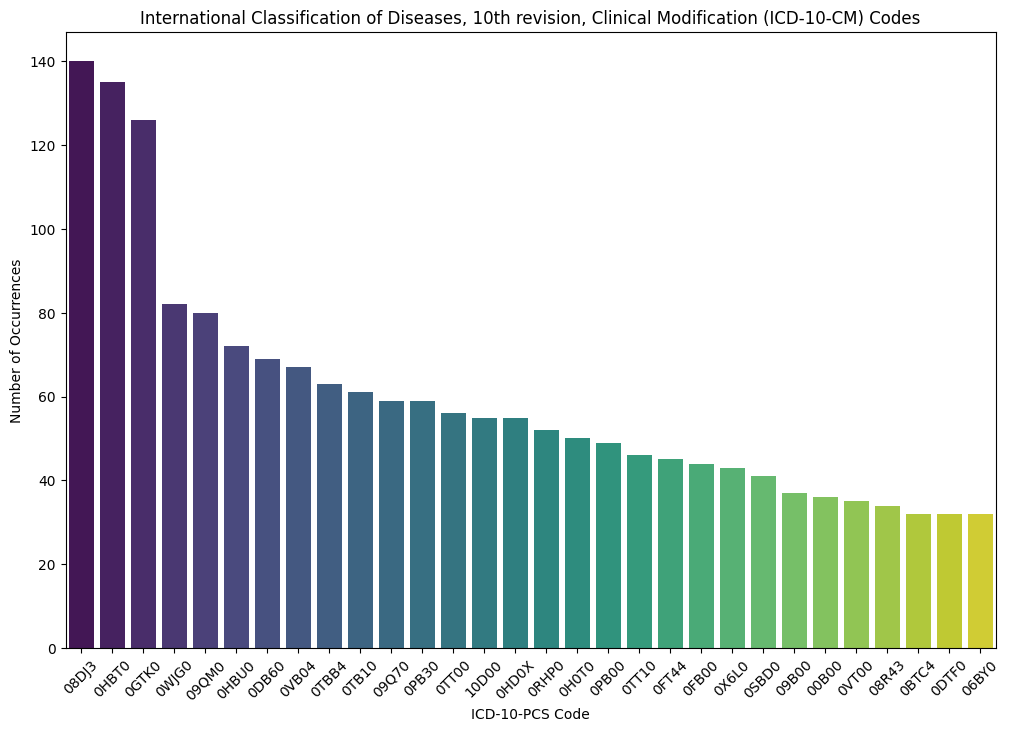

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 ICD-10-PCS codes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_icd10_pcs.index, y=top_10_icd10_pcs.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("International Classification of Diseases, 10th revision, Clinical Modification (ICD-10-CM) Codes")
plt.ylabel("Number of Occurrences")
plt.xlabel("ICD-10-PCS Code")
plt.show()

Department

In [20]:
unique_department = df_operations['department'].nunique()
print(unique_department)

11


In [21]:
unique_department = df_operations['department'].unique()
print(unique_department[:16])

['OS' 'OT' 'GS' 'OL' 'UR' 'NS' 'CTS' 'OG' 'PS' 'RAD' 'IM']


In [22]:
top_10_department  = df_operations['department'].value_counts().head(16)
print(top_10_department )

department
GS     1560
OS      828
OT      608
OL      446
OG      425
NS      392
UR      388
CTS     207
PS      133
RAD       8
IM        5
Name: count, dtype: int64


OG: Obstetrics and Gynecology
GS: General Surgery
OS: Orthopedic Surgery
OT: Occupational Therapy (though in a department context, this might mean something else)
CTS: Cardiothoracic Surgery
UR: Urology
OL: Otolaryngology (Ear, Nose, and Throat or ENT)
NS: Neurosurgery or Neurological Surgery
PS: Plastic Surgery
EM: Emergency Medicine
AN: Anesthesiology
RO: Radiation Oncology
IM: Internal Medicine
PED: Pediatrics
DM:  Dhermathology
RAD: Radiology

Anaesthesia type

In [23]:
unique_antype = df_operations['antype'].nunique()
print(unique_antype)

4


In [24]:
unique_antype = df_operations['antype'].unique()
print(unique_antype[:4])

['General' 'MAC' 'Neuraxial' 'Regional']


In [25]:
top_10_antype= df_operations['antype'].value_counts().head(4)
print(top_10_antype)

antype
General      4187
MAC           462
Neuraxial     348
Regional        3
Name: count, dtype: int64


Duration of stay time is dischage time (all tines are shown in minutes)

In [26]:
print(df_operations['admission_time'] [:15])

0           0
1         681
2     2231764
3         153
4           0
5           0
6        1340
7         442
8     1145400
9         445
10      38880
11      30459
12          0
13         12
14          0
Name: admission_time, dtype: int64


In [27]:
print(df_operations['discharge_time'] [:15])

0       14269
1     1405183
2     2990006
3       12221
4        8841
5      128520
6        6821
7        7854
8      324633
9       11280
10      50430
11      37566
12       1435
13      14106
14       8544
Name: discharge_time, dtype: int64


Duration of anesthesia

In [28]:
print(df_operations['anstart_time'] [:15])

0        2198.0
1          76.0
2     1349676.0
3        1282.0
4        1340.0
5      100412.0
6        3093.0
7         -10.0
8       16345.0
9        2986.0
10      51535.0
11      34789.0
12       1473.0
13        786.0
14       2872.0
Name: anstart_time, dtype: float64


In [29]:
print(df_operations['anend_time'] [:15])

0        3146.0
1     1728838.0
2     1810647.0
3        3795.0
4        2269.0
5      140139.0
6        3458.0
7          65.0
8      756687.0
9        2560.0
10      61695.0
11      43983.0
12        101.0
13       2637.0
14       3208.0
Name: anend_time, dtype: float64


In [30]:
df_operations['an_duration'] = df_operations['anend_time'] - df_operations['anstart_time']
print(df_operations['an_duration'] [:15])

0         948.0
1     1728762.0
2      460971.0
3        2513.0
4         929.0
5       39727.0
6         365.0
7          75.0
8      740342.0
9        -426.0
10      10160.0
11       9194.0
12      -1372.0
13       1851.0
14        336.0
Name: an_duration, dtype: float64


In [31]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration'],
      dtype='object')

Duration of operation

In [32]:
print(df_operations['opstart_time'] [:15])

0        1646.0
1     1067240.0
2     2214716.0
3        3612.0
4        1206.0
5       95945.0
6        3006.0
7          83.0
8           0.0
9        2206.0
10      59129.0
11      34254.0
12          0.0
13       1757.0
14       2927.0
Name: opstart_time, dtype: float64


In [33]:
print(df_operations['opend_time'] [:15])

0        3415.0
1         565.0
2     3576500.0
3        4864.0
4        2757.0
5       96501.0
6        5132.0
7        1347.0
8      304421.0
9        3656.0
10      67427.0
11      49310.0
12       2028.0
13       3645.0
14       2826.0
Name: opend_time, dtype: float64


In [34]:
df_operations['op_duration'] = df_operations['opend_time'] - df_operations['opstart_time']
print(df_operations['op_duration'] [:15])

0        1769.0
1    -1066675.0
2     1361784.0
3        1252.0
4        1551.0
5         556.0
6        2126.0
7        1264.0
8      304421.0
9        1450.0
10       8298.0
11      15056.0
12       2028.0
13       1888.0
14       -101.0
Name: op_duration, dtype: float64


In [35]:
unique_op_time = df_operations['op_duration'].unique()
print(unique_op_time)

[ 1.769000e+03 -1.066675e+06  1.361784e+06 ... -6.750000e+02 -2.346100e+05
  1.572000e+03]


In [36]:
top_10_op_time= df_operations['op_duration'].value_counts().head(10)
print(top_10_op_time)

op_duration
55.0      62
416.0      8
1041.0     6
1372.0     6
1314.0     6
815.0      6
540.0      6
717.0      5
658.0      5
1108.0     5
Name: count, dtype: int64


In [37]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration'],
      dtype='object')

Duration of Cardiopumonary bypass

In [38]:
print(df_operations['cpbon_time'] [:15])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: cpbon_time, dtype: float64


In [39]:
unique_cpbon_time = df_operations['cpbon_time'].unique()
print(unique_cpbon_time)

[    nan  10500. 192946.   6799.  10160.  10178. 192960.   5989.   7293.
 192866.  13932.  11512.  10246.   9934.   9386.  13982.   8661.   9324.
   8218.   9137. 192990.  16631.   9808.   5503.  17360. 193085.   8592.
  14104. 193035. 192835.   7405.   3546. 193000. 192839.  11075.   8260.
   9113.   8553. 192925.   9720.  14877. 193077.   7558. 193137.  13607.
  17202.  12842.   9098.   7579.   4666.  11183.   8479.   6066.  12078.
   7130.]


In [40]:
print(df_operations['cpboff_time'] [:15])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: cpboff_time, dtype: float64


In [41]:
df_operations['cpb_duration'] = df_operations['cpboff_time'] - df_operations['cpbon_time']
print(df_operations['cpb_duration'] [:15])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: cpb_duration, dtype: float64


In [42]:
unique_cpb_time = df_operations['cpb_duration'].unique()
print(unique_cpb_time)

[         nan -1.54700e+03 -1.39600e+03  1.06700e+03 -1.84284e+05
 -1.48200e+03  3.63400e+03  5.15000e+02 -2.79300e+03  1.11700e+03
  1.78200e+03  1.27000e+03  8.91000e+02  1.90300e+03  1.21900e+03
 -1.50200e+03 -1.07400e+03 -2.00600e+03  1.01600e+03 -1.41800e+03
  1.61000e+02  7.99000e+02  2.11000e+02  1.36500e+03 -1.86843e+05
  8.67000e+02 -1.17400e+03  1.05100e+03 -2.37000e+03 -3.03800e+03
  9.62000e+02 -2.01000e+02 -2.83100e+03  7.54000e+02 -2.92000e+03
  2.81800e+03  2.00000e+03  5.98000e+02 -1.61000e+03  1.87140e+05
 -1.28000e+02 -1.94500e+03]


In [43]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration', 'cpb_duration'],
      dtype='object')

Duration of ICU stay

In [44]:
print(df_operations['icuin_time'] [:15])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13    1925.0
14       NaN
Name: icuin_time, dtype: float64


In [45]:
print(df_operations['icuout_time'] [:15])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13    4349.0
14       NaN
Name: icuout_time, dtype: float64


In [46]:
df_operations['icu_duration'] = df_operations['icuout_time'] - df_operations['icuin_time']
print(df_operations['icu_duration'] [:15])


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13    2424.0
14       NaN
Name: icu_duration, dtype: float64


In [47]:
unique_icu_time = df_operations['icu_duration'].unique()
print(unique_icu_time)

[          nan  2.424000e+03  3.328000e+03  3.260000e+02  3.247000e+03
  2.526000e+03  2.744300e+04  1.832000e+03  2.049000e+03  6.260000e+02
  6.333000e+03  2.824000e+03 -4.860000e+02 -8.000000e+00  2.009000e+03
  6.969000e+03  1.222000e+03  4.810000e+02  3.699000e+03  1.680000e+03
  1.679000e+03  1.927000e+03  1.735000e+03  3.071000e+03  1.779000e+03
  1.406000e+03  4.089000e+03  2.246900e+04 -5.361000e+03  2.492100e+04
 -7.920600e+04  1.413000e+03 -9.790000e+03 -5.410000e+03 -1.806000e+03
  1.781000e+03  1.665000e+03 -1.010215e+06  4.666000e+03  6.190000e+02
 -7.372450e+05 -1.718810e+05  5.310000e+02 -7.530000e+02 -5.346300e+04
  1.697000e+03 -2.800000e+02  3.850000e+02  3.350000e+03  2.106000e+03
  7.680000e+02  2.959000e+03 -3.580000e+03 -1.655970e+05  2.110000e+03
 -3.043320e+05 -3.464070e+05  1.436000e+03  1.932000e+03  2.502000e+03
  2.604000e+03  7.720000e+02  1.767300e+04 -2.977000e+03 -1.580000e+02
  9.860000e+02  2.442000e+03  2.495200e+04 -4.231600e+05 -1.423000e+03
 -5.93

In [48]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration', 'cpb_duration',
       'icu_duration'],
      dtype='object')

In hospital death

In [49]:
unique_inhosp_death_time = df_operations['inhosp_death_time'].unique()
print(unique_inhosp_death_time)

[    nan 131777. 712225. 712446. 133097. 712351. 712353.  49035.  54256.
  71683. 712311. 712177.  54568. 712282.  50606. 712303. 712361. 712186.
 712350. 712406. 712140. 156572. 712572. 712149. 712344.  61953.]


Correlation analysis

Correlation values range between -1 and 1. A value close to 1 implies a strong positive correlation: as one variable increases, the other also tends to. A value close to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease.
This analysis only checks for linear relationships. Non-linear relationships won't be captured well by the correlation coefficient.
Correlation does not imply causation. Even if two variables are correlated, it doesn't mean one causes the other.

In [50]:
#Find the correlation between operation duration and age

correlation_with_age = df_operations['op_duration'].corr(df_operations['age'])
print(f"Correlation of operation duration with age: {correlation_with_age}")


Correlation of operation duration with age: 0.024943776824717448


In [51]:
#'Type of surgery' is likely categorical (represented by the icd10_pcs column). Find the average operation duration for each type of surgery

average_duration_per_surgery = df_operations.groupby('icd10_pcs')['op_duration'].mean().sort_values(ascending=False)
print(average_duration_per_surgery)

icd10_pcs
08DJ7    2.039688e+06
0PP00    1.937252e+06
0BBG4    1.422633e+06
0DT54    1.361784e+06
0T0B0    1.239443e+06
             ...     
0X6S0   -1.184815e+06
0020D   -1.404253e+06
07BH0   -1.866510e+06
0HS00   -2.404518e+06
0N0RX   -2.604233e+06
Name: op_duration, Length: 685, dtype: float64


In [52]:
#Infer post-op ICU admission based on whether icuin_time is non-null. Create a binary column to indicate this and compute its correlation with operation duration.
df_operations['icu_admission_postop'] = ~df_operations['icuin_time'].isna()
correlation_with_icu_admission = df_operations['op_duration'].corr(df_operations['icu_admission_postop'])
print(f"Correlation of operation duration with post-op ICU admission: {correlation_with_icu_admission}")


Correlation of operation duration with post-op ICU admission: -0.008113761292122764


In [53]:
correlation_duration_deterioration = df_operations['discharge_time'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between duration of stay and deterioration: {correlation_duration_deterioration}")

Correlation between duration of stay and deterioration: -0.0002863602910907662


In [54]:
correlation_icu_deterioration = df_operations['icu_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ICU duration and deterioration: {correlation_icu_deterioration}")

Correlation between ICU duration and deterioration: -0.027225331061133968


In [55]:
correlation_age_deterioration = df_operations['age'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between patient's age and deterioration: {correlation_age_deterioration}")

Correlation between patient's age and deterioration: 0.04653032860059013


In [56]:
correlation_anesthesia_deterioration = df_operations['an_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between anesthesia time and deterioration: {correlation_anesthesia_deterioration}")

Correlation between anesthesia time and deterioration: -0.002558997576903286


In [57]:
deterioration_by_department = df_operations.groupby('department').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(deterioration_by_department.sort_values(ascending=False))


department
CTS    0.043478
NS     0.017857
PS     0.007519
OL     0.004484
UR     0.002577
GS     0.001923
OT     0.001645
OS     0.001208
IM     0.000000
OG     0.000000
RAD    0.000000
dtype: float64


In [58]:
correlation_emop_deterioration = df_operations['emop'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between emergency operation and deterioration: {correlation_emop_deterioration}")


Correlation between emergency operation and deterioration: 0.059169780763825584


In [59]:
correlation_weight_deterioration = df_operations['weight'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
correlation_height_deterioration = df_operations['height'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between weight and deterioration: {correlation_weight_deterioration}")
print(f"Correlation between height and deterioration: {correlation_height_deterioration}")


Correlation between weight and deterioration: -0.02944682539962461
Correlation between height and deterioration: 0.025037461987269468


In [60]:
# For categorical variables like sex and race, you might want to use groupby and calculate deterioration rates for each group
sex_deterioration_rate = df_operations.groupby('sex').apply(lambda x: x['inhosp_death_time'].notnull().mean())
race_deterioration_rate = df_operations.groupby('race').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(sex_deterioration_rate)
print(race_deterioration_rate)


sex
F    0.003188
M    0.008052
dtype: float64
race
Asian    0.005
dtype: float64


In [61]:
correlation_asa_deterioration = df_operations['asa'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ASA score and deterioration: {correlation_asa_deterioration}")


Correlation between ASA score and deterioration: 0.08789388690539376


In [62]:
#Certain surgical procedures might have higher risks associated with them.
procedure_deterioration_rate = df_operations.groupby('icd10_pcs').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(procedure_deterioration_rate.sort_values(ascending=False).head(30))


icd10_pcs
0TSC0    0.500000
0DBP0    0.500000
0LB00    0.333333
0UQG0    0.333333
001U0    0.250000
0PSC0    0.250000
0TB00    0.142857
0UT9F    0.125000
00BT0    0.111111
0PHPX    0.111111
0WBC0    0.100000
0BTJ4    0.100000
081J3    0.083333
0W3G0    0.052632
0RB30    0.050000
0BTK3    0.045455
0QHD0    0.040000
0RHP0    0.038462
0UT94    0.034483
0FB00    0.022727
0H0T0    0.020000
09Q70    0.016949
0TBB4    0.015873
0HBT0    0.007407
0PPC0    0.000000
0PS30    0.000000
0PHC0    0.000000
0QB90    0.000000
0QB60    0.000000
0Q870    0.000000
dtype: float64


In [63]:
df_operations['time_to_icu_postop'] = df_operations['icuin_time'] - df_operations['opend_time']
correlation_time_to_icu_deterioration = df_operations['time_to_icu_postop'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between time to ICU post-operation and deterioration: {correlation_time_to_icu_deterioration}")


Correlation between time to ICU post-operation and deterioration: -0.04531463961766051


In [64]:

correlation_icu_stay_deterioration = df_operations['icu_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ICU stay duration and deterioration: {correlation_icu_stay_deterioration}")


Correlation between ICU stay duration and deterioration: -0.027225331061133968


In [65]:
department_deterioration_rate = df_operations.groupby('department').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(department_deterioration_rate.sort_values(ascending=False))


department
CTS    0.043478
NS     0.017857
PS     0.007519
OL     0.004484
UR     0.002577
GS     0.001923
OT     0.001645
OS     0.001208
IM     0.000000
OG     0.000000
RAD    0.000000
dtype: float64


In [66]:
antype_deterioration_rate = df_operations.groupby('antype').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(antype_deterioration_rate.sort_values(ascending=False))


antype
General      0.005732
MAC          0.002165
Neuraxial    0.000000
Regional     0.000000
dtype: float64


In [68]:
import pandas as pd

# Assuming df is your DataFrame with the INSPIRE dataset
# And the function is being passed the dataframe and a subject_id to look for
def print_patient_operation_details(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['subject_id'] == subject_id]
    
    # Extracting the relevant information
    operation_begin = patient_data['opstart_time'].dropna()
    operation_end = patient_data['opend_time'].dropna()
    icu_in = patient_data['icuin_time'].dropna()
    icu_out = patient_data['icuout_time'].dropna()
    discharge_time = patient_data['admission_time'].dropna() # Verify if 'admission_time' is correct for discharge time
    death_time = patient_data['inhosp_death_time'].dropna() # Verify if 'inhosp_death_time' is correct for hospital death time
    department_info = patient_data['department'].dropna()
    icd10_pcs_codes = patient_data['icd10_pcs'].dropna()
    anesthesia_start = patient_data['anstart_time'].dropna() # Assuming 'anestart_time' is the column for anesthesia start time
    anesthesia_end = patient_data['anend_time'].dropna() # Assuming 'aneend_time' is the column for anesthesia end time
    
    # Print the details
    if not operation_begin.empty:
        print(f"Operation start time(s) for subject_id {subject_id}: {operation_begin.values}")
    else:
        print(f"No operation start time found for subject_id {subject_id}")
    
    if not operation_end.empty:
        print(f"Operation end time(s) for subject_id {subject_id}: {operation_end.values}")
    else:
        print(f"No operation end time found for subject_id {subject_id}")
    
    if not icu_in.empty:
        print(f"ICU admission time(s) for subject_id {subject_id}: {icu_in.values}")
    else:
        print(f"No ICU admission time found for subject_id {subject_id}")
    
    if not icu_out.empty:
        print(f"ICU discharge time(s) for subject_id {subject_id}: {icu_out.values}")
    else:
        print(f"No ICU discharge time found for subject_id {subject_id}")
    
    if not discharge_time.empty:
        print(f"Discharge time(s) for subject_id {subject_id}: {discharge_time.values}")
    else:
        print(f"No discharge time found for subject_id {subject_id}")
    
    if not death_time.empty:
        print(f"Hospital death time(s) for subject_id {subject_id}: {death_time.values}")
    else:
        print(f"No hospital death time found for subject_id {subject_id}")
    
    if not department_info.empty:
        print(f"Department(s) for subject_id {subject_id}: {department_info.values}")
    else:
        print(f"No department information found for subject_id {subject_id}")
    
    if not icd10_pcs_codes.empty:
        print(f"ICD-10-PCS code(s) for subject_id {subject_id}: {icd10_pcs_codes.values}")
    else:
        print(f"No ICD-10-PCS codes found for subject_id {subject_id}")
    
    if not anesthesia_start.empty:
        print(f"Anesthesia start time(s) for subject_id {subject_id}: {anesthesia_start.values}")
    else:
        print(f"No anesthesia start time found for subject_id {subject_id}")
    
    if not anesthesia_end.empty: 
        print(f"Anesthesia end time(s) for subject_id {subject_id}: {anesthesia_end.values}")
    else:
        print(f"No anesthesia end time found for subject_id {subject_id}")

# Example usage:
# Replace 'your_dataframe' with the variable name of your actual DataFrame
print_patient_operation_details(df=df_operations, subject_id=143088952)


Operation start time(s) for subject_id 143088952: [1067240.]
Operation end time(s) for subject_id 143088952: [565.]
No ICU admission time found for subject_id 143088952
No ICU discharge time found for subject_id 143088952
Discharge time(s) for subject_id 143088952: [681]
No hospital death time found for subject_id 143088952
Department(s) for subject_id 143088952: ['OT']
ICD-10-PCS code(s) for subject_id 143088952: ['0DB50']
Anesthesia start time(s) for subject_id 143088952: [76.]
Anesthesia end time(s) for subject_id 143088952: [1728838.]


[147111913 143088952 129805443 171722058 102580460 145739438 161155338
 151014117 152497007 172234516 110395289 112613171 174695688 101726611
 148204368 120920393 172645535 161704798 194241122 173328259 103551079
 180388377 147765754 130476061 101594386 167940870 109071037 165949853
 109895005 118509191]